In [ ]:
test

In [ ]:
# Importing necesary libraries
import sklearn
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

pd.set_option('display.max_columns', None)

In [ ]:
data = pd.read_csv('retail_data.csv')

In [ ]:
data.shape

(302010, 30)

There is ~300,000 rows and 30 columns, some columns contain sensible data, this will be dropped. Time and Order Status too

In [ ]:
data = data.drop(['Name','Email','Phone','Address','Time','Order_Status'],axis=1)

In [ ]:
data.head()

,Transaction_ID,Customer_ID,City,State,Zipcode,Country,Age,Gender,Income,Customer_Segment,Date,Year,Month,Total_Purchases,Amount,Total_Amount,Product_Category,Product_Brand,Product_Type,Feedback,Shipping_Method,Payment_Method,Ratings,products
0,8691788.000,37249.000,Dortmund,Berlin,77985.000,Germany,21.000,Male,Low,Regular,9/18/2023,2023.000,September,3.000,108.029,324.086,Clothing,Nike,Shorts,Excellent,Same-Day,Debit Card,5.000,Cycling shorts
1,2174773.000,69749.000,Nottingham,England,99071.000,UK,19.000,Female,Low,Premium,12/31/2023,2023.000,December,2.000,403.354,806.708,Electronics,Samsung,Tablet,Excellent,Standard,Credit Card,4.000,Lenovo Tab
2,6679610.000,30192.000,Geelong,New South Wales,75929.000,Australia,48.000,Male,Low,Regular,4/26/2023,2023.000,April,3.000,354.478,1063.433,Books,Penguin Books,Children's,Average,Same-Day,Credit Card,2.000,Sports equipment
3,7232460.000,62101.000,Edmonton,Ontario,88420.000,Canada,56.000,Male,High,Premium,05-08-23,2023.000,May,7.000,352.408,2466.854,Home Decor,Home Depot,Tools,Excellent,Standard,PayPal,4.000,Utility knife
4,4983775.000,27901.000,Bristol,England,48704.000,UK,22.000,Male,Low,Premium,01-10-24,2024.000,January,2.000,124.277,248.553,Grocery,Nestle,Chocolate,Bad,Standard,Cash,1.000,Chocolate cookies


In [ ]:
data.columns

Index(['Transaction_ID', 'Customer_ID', 'City', 'State', 'Zipcode', 'Country',
       'Age', 'Gender', 'Income', 'Customer_Segment', 'Date', 'Year', 'Month',
       'Total_Purchases', 'Amount', 'Total_Amount', 'Product_Category',
       'Product_Brand', 'Product_Type', 'Feedback', 'Shipping_Method',
       'Payment_Method', 'Ratings', 'products'],
      dtype='object')

Now with the sensible data out i will start with some EDA

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 302010 entries, 0 to 302009
Data columns (total 24 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   Transaction_ID    301677 non-null  float64
 1   Customer_ID       301702 non-null  float64
 2   City              301762 non-null  object 
 3   State             301729 non-null  object 
 4   Zipcode           301670 non-null  float64
 5   Country           301739 non-null  object 
 6   Age               301837 non-null  float64
 7   Gender            301693 non-null  object 
 8   Income            301720 non-null  object 
 9   Customer_Segment  301795 non-null  object 
 10  Date              301651 non-null  object 
 11  Year              301660 non-null  float64
 12  Month             301737 non-null  object 
 13  Total_Purchases   301649 non-null  float64
 14  Amount            301653 non-null  float64
 15  Total_Amount      301660 non-null  float64
 16  Product_Category  30

The data has
- 9 Numeric columns
- 15 Object columns
- There is some Null Values. I will check the % of missing data to see if it will be dropped or replaced with mean/mode

In [ ]:
data.isnull().any(axis=1).sum()

np.int64(6149)

There is 6723 rows with NullValues it is a very small percentage of the data, it will be dropped

In [ ]:
data = data.dropna()

In [ ]:
data.shape

(295861, 24)

In [ ]:
data.duplicated().sum()

np.int64(3)

In [ ]:
dup_rows = data.duplicated()
data[dup_rows]

,Transaction_ID,Customer_ID,City,State,Zipcode,Country,Age,Gender,Income,Customer_Segment,Date,Year,Month,Total_Purchases,Amount,Total_Amount,Product_Category,Product_Brand,Product_Type,Feedback,Shipping_Method,Payment_Method,Ratings,products
299759,4476510.000,20103.000,Kitchener,Ontario,7099.000,Canada,54.000,Female,Low,Regular,12-10-23,2023.000,December,7.000,134.374,940.619,Clothing,Adidas,T-shirt,Bad,Express,Credit Card,1.000,Off-the-shoulder tee
301362,4942326.000,25416.000,Leicester,England,57655.000,UK,63.000,Male,Low,Regular,05-05-23,2023.000,May,8.000,191.907,1535.255,Clothing,Adidas,Jacket,Average,Same-Day,Cash,2.000,Varsity jacket
301486,3200766.000,49598.000,Bremen,Berlin,64747.000,Germany,59.000,Male,Low,New,11/23/2023,2023.000,November,9.000,272.327,2450.947,Grocery,Pepsi,Soft Drink,Bad,Standard,Cash,1.000,Iced tea


The rows are not duplicated. I will consider all data as unique

In [ ]:
data['Customer_ID'].nunique()

86568

There is 86,561 unique costumers

In [ ]:
pd.options.display.float_format = '{:.3f}'.format
data.describe()

,Transaction_ID,Customer_ID,Zipcode,Age,Year,Total_Purchases,Amount,Total_Amount,Ratings
count,295861.000,295861.000,295861.000,295861.000,295861.000,295861.000,295861.000,295861.000,295861.000
mean,5493719.614,55017.864,50288.587,35.468,2023.165,5.360,255.150,1367.601,3.162
std,2595856.330,26009.604,28978.227,15.020,0.371,2.869,141.391,1128.844,1.321
min,1000007.000,10000.000,501.000,18.000,2023.000,1.000,10.000,10.004,1.000
25%,3245942.000,32473.000,25409.000,22.000,2023.000,3.000,132.850,438.821,2.000
50%,5496085.000,55027.000,50586.000,32.000,2023.000,5.000,255.461,1041.163,3.000
75%,7737882.000,77525.000,75256.000,46.000,2023.000,8.000,377.617,2029.404,4.000
max,9999995.000,99999.000,99949.000,70.000,2024.000,10.000,499.998,4999.626,5.000


- Costumers age goes from 18 to 70
- This dataset has transactions of 2023 and 2024
- The mean total purchases is 5, most customers buy more than 3 times.
- The minimum quantity of products purchased in a transaction is 10, I can infer that it is a wholesale store, and the maximum quantity of products purchased is 500

I will create a new column, Age range, in intervals of 5, it is easier to see this way and find patterns

In [ ]:
bins = range(15,76,5)
labels = [f'{i}-{i+4}' for i in range(15,75,5)]

data['Age_range'] = pd.cut(data['Age'], bins=bins, labels=labels, right=False)

data.head()

,Transaction_ID,Customer_ID,City,State,Zipcode,Country,Age,Gender,Income,Customer_Segment,Date,Year,Month,Total_Purchases,Amount,Total_Amount,Product_Category,Product_Brand,Product_Type,Feedback,Shipping_Method,Payment_Method,Ratings,products,Age_range
0,8691788.000,37249.000,Dortmund,Berlin,77985.000,Germany,21.000,Male,Low,Regular,9/18/2023,2023.000,September,3.000,108.029,324.086,Clothing,Nike,Shorts,Excellent,Same-Day,Debit Card,5.000,Cycling shorts,20-24
1,2174773.000,69749.000,Nottingham,England,99071.000,UK,19.000,Female,Low,Premium,12/31/2023,2023.000,December,2.000,403.354,806.708,Electronics,Samsung,Tablet,Excellent,Standard,Credit Card,4.000,Lenovo Tab,15-19
2,6679610.000,30192.000,Geelong,New South Wales,75929.000,Australia,48.000,Male,Low,Regular,4/26/2023,2023.000,April,3.000,354.478,1063.433,Books,Penguin Books,Children's,Average,Same-Day,Credit Card,2.000,Sports equipment,45-49
3,7232460.000,62101.000,Edmonton,Ontario,88420.000,Canada,56.000,Male,High,Premium,05-08-23,2023.000,May,7.000,352.408,2466.854,Home Decor,Home Depot,Tools,Excellent,Standard,PayPal,4.000,Utility knife,55-59
4,4983775.000,27901.000,Bristol,England,48704.000,UK,22.000,Male,Low,Premium,01-10-24,2024.000,January,2.000,124.277,248.553,Grocery,Nestle,Chocolate,Bad,Standard,Cash,1.000,Chocolate cookies,20-24


In [ ]:
df = data.copy()

In [ ]:
# Code to plot a boxplot and a histogram
def box_hist(col):
  f, (ax_box, ax_hist) = plt.subplots(2, sharex=True, gridspec_kw={"height_ratios": (.3, .7)})
  sns.boxplot(data=df, x=df[col], ax=ax_box, showmeans=True,color='c',meanprops={"markerfacecolor":"y","markeredgecolor":"y"})
  sns.histplot(data=df, x=df[col],kde=True, ax=ax_hist,color='c')
  plt.xticks(rotation=45)
  plt.tight_layout();

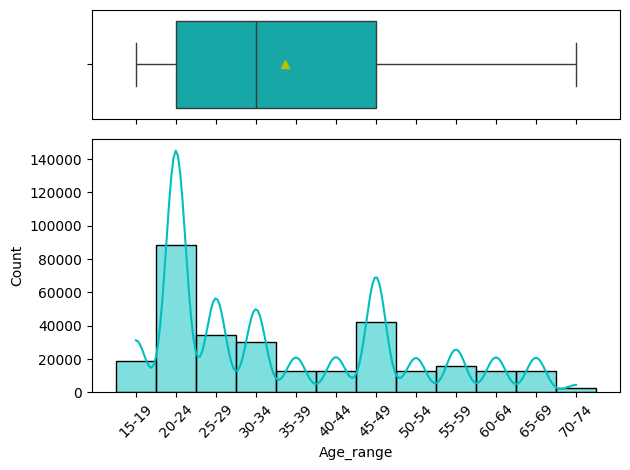

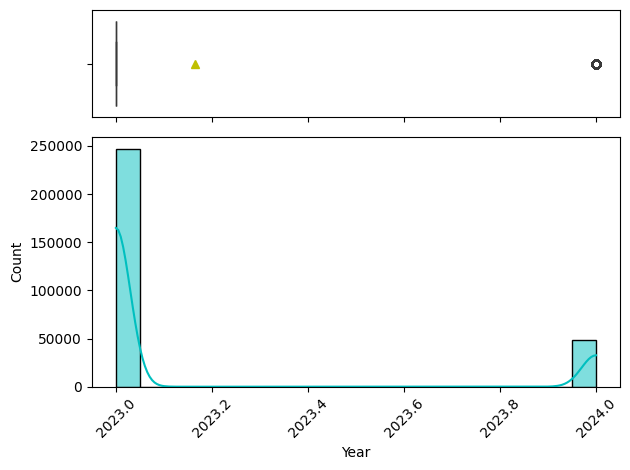

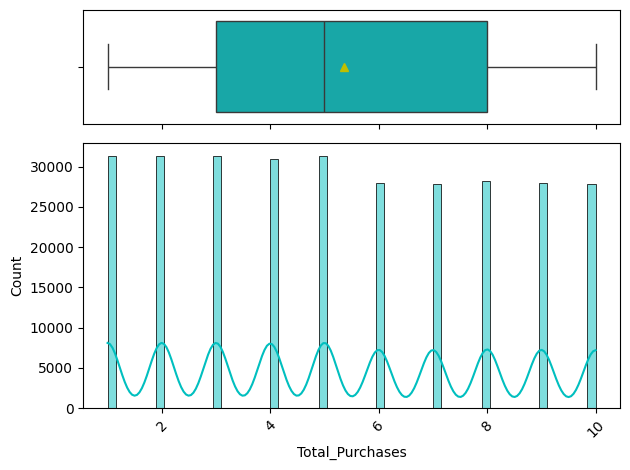

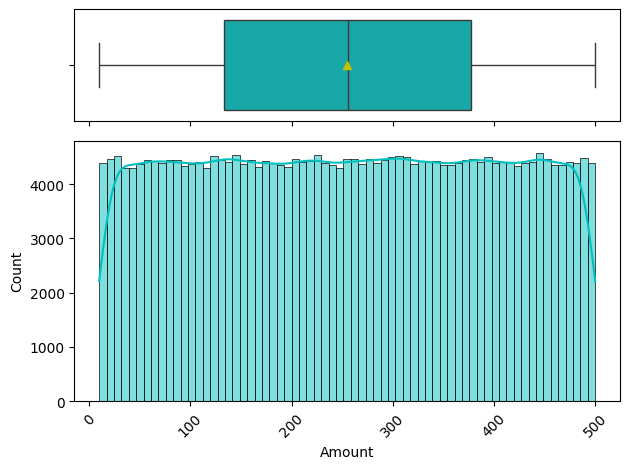

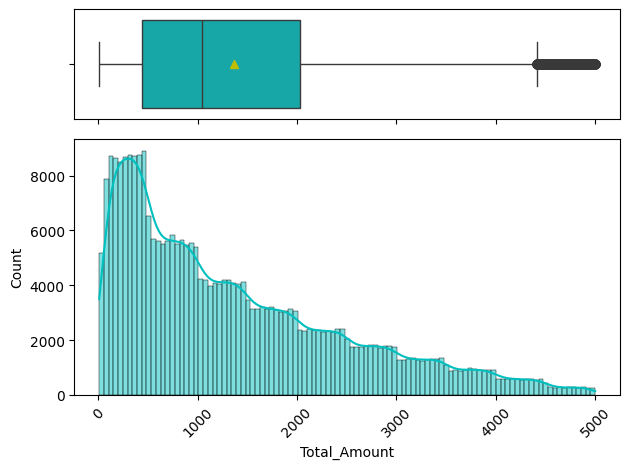

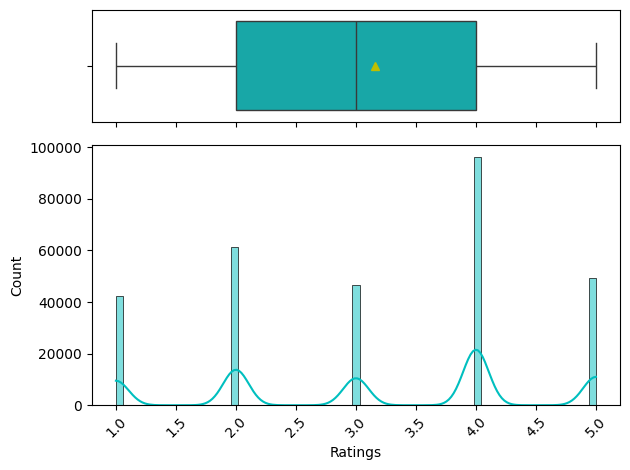

In [ ]:
cols_to_check = ['Age_range','Year','Total_Purchases','Amount','Total_Amount','Ratings']

for i in cols_to_check:
    box_hist(i)

- 50% of the orders are from customers aged between 20 and 49. It's important to note that we have approximately 84,000 customers and 300,000 orders. I will create a separate DataFrame specifically for customers.

- Almost all orders were placed in 2023.

- Total purchases and amounts show a very uniform distribution.

- The total amount exhibits a right-skewed distribution, with the majority of data falling between approximately $500 and $2000.

- Ratings predominantly range between 2 and 4, with a higher frequency of ratings at 4, indicating that most products are highly regarded.

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 295861 entries, 0 to 302009
Data columns (total 25 columns):
 #   Column            Non-Null Count   Dtype   
---  ------            --------------   -----   
 0   Transaction_ID    295861 non-null  float64 
 1   Customer_ID       295861 non-null  float64 
 2   City              295861 non-null  object  
 3   State             295861 non-null  object  
 4   Zipcode           295861 non-null  float64 
 5   Country           295861 non-null  object  
 6   Age               295861 non-null  float64 
 7   Gender            295861 non-null  object  
 8   Income            295861 non-null  object  
 9   Customer_Segment  295861 non-null  object  
 10  Date              295861 non-null  object  
 11  Year              295861 non-null  float64 
 12  Month             295861 non-null  object  
 13  Total_Purchases   295861 non-null  float64 
 14  Amount            295861 non-null  float64 
 15  Total_Amount      295861 non-null  float64 
 16  Product

In [ ]:
# Code to see some of the values that some columns contain and see the percentage that this represents
cat_cols = ['Country','Gender','Income','Customer_Segment','Month','Product_Category','Product_Brand','Product_Type','Feedback','Shipping_Method','Payment_Method']

for i in df[cat_cols]:
  print('*'*25)
  print(df[i].value_counts(normalize=True))

*************************
Country
USA         0.316
UK          0.209
Germany     0.175
Australia   0.150
Canada      0.150
Name: proportion, dtype: float64
*************************
Gender
Male     0.622
Female   0.378
Name: proportion, dtype: float64
*************************
Income
Medium   0.432
Low      0.319
High     0.250
Name: proportion, dtype: float64
*************************
Customer_Segment
Regular   0.485
New       0.302
Premium   0.213
Name: proportion, dtype: float64
*************************
Month
April       0.137
January     0.124
August      0.109
July        0.102
May         0.094
March       0.063
October     0.063
December    0.063
September   0.062
June        0.061
November    0.061
February    0.060
Name: proportion, dtype: float64
*************************
Product_Category
Electronics   0.236
Grocery       0.222
Clothing      0.181
Books         0.181
Home Decor    0.180
Name: proportion, dtype: float64
*************************
Product_Brand
Pepsi          

In [ ]:
# Just wanted to verify that Non-Fiction is a book
df[df['Product_Type']=='Non-Fiction'].head()

,Transaction_ID,Customer_ID,City,State,Zipcode,Country,Age,Gender,Income,Customer_Segment,Date,Year,Month,Total_Purchases,Amount,Total_Amount,Product_Category,Product_Brand,Product_Type,Feedback,Shipping_Method,Payment_Method,Ratings,products,Age_range
11,1609659.000,66883.000,Portsmouth,England,91253.000,UK,31.000,Female,Medium,Regular,6/21/2023,2023.000,June,1.000,364.831,364.831,Books,Random House,Non-Fiction,Average,Standard,Credit Card,2.000,Science,30-34
21,8871554.000,63914.000,Portsmouth,England,16385.000,UK,61.000,Male,High,Regular,08-06-23,2023.000,August,4.000,200.287,801.149,Books,HarperCollins,Non-Fiction,Average,Standard,PayPal,2.000,Business,60-64
22,9476855.000,42410.000,Portsmouth,England,83903.000,UK,21.000,Female,Low,Regular,02-03-24,2024.000,February,6.000,34.124,204.746,Books,Penguin Books,Non-Fiction,Average,Same-Day,PayPal,2.000,Self-help,20-24
59,4021565.000,59819.000,Portsmouth,England,28089.000,UK,29.000,Male,Medium,Regular,10-08-23,2023.000,October,9.000,474.827,4273.442,Books,Random House,Non-Fiction,Average,Standard,PayPal,2.000,History,25-29
65,9202969.000,35966.000,Portsmouth,England,41418.000,UK,69.000,Male,Low,Regular,2/20/2024,2024.000,February,4.000,187.093,748.370,Books,HarperCollins,Non-Fiction,Bad,Express,Cash,1.000,Cooking,65-69


In [ ]:
# Histogram to see Total purchases, Amount and Total amount vs the categorical values